# Анали главных компонент потенциала развития возобновляемых источников энергии (ВИЭ) в регионах Японии в 2023 г.

Настоящий файл содержит расчет главных компонент префектур Японии по уровню потенциального развития возобновляемых источников энергии (ВИЭ).

Код состоит из следующих частей:

1.   Расчет главной компоненты по отдельным направлениям (технологический, экономический, экологический, энергетический потенциал и показатели защиты окружающей среды);

2.   Расчет единой главной компоненты (индекс потенциального развития ВИЭ) на основе четырех показателей, полученных в пункте 1

3.   Составление визуализации полученных результатов на карте по отдельным регионам Японии


*Источники данных: E-stat, Центр социально-экономических исследований Кабинета министров Японии, Министерство экономики, торговли и промышленности Японии, Министерство окружающей среды Японии, Министерство внутренних дел и коммуникации Японии*

Глоссарий

Prefecture - название региона Японии

GDP - ВРП региона

FD - уровень финансового развития (кол-во кредитов\ВРП)

Openness - уровень открытости торговли (объем торговли\ВРП)

FDI - уровень прямых иностранных инвестиций (доля в ВРП)

Urbanization - уровень урбанизации

EP_EXP - расходы на защиту окружающей среды (доля в ВРП)

RD_EXP - расходы на НИОКР (доля в ВРП)

RD_EMP - кол-во занятых в НИОКР (доля в общей занятости)

HM_MR - доля наукоемких производств на душу населения в ВРП, log

EN_DF - энергонезависимость региона (производство электроэнергии*100/потреблеие электроэнергии)

SO2 - объем выбросов SO2 на душу населения

EN_IN - интенсивность использования электроэнергии

INS_CAP - производственная мощность электростанций

RE_S - доля ВИЭ в структуре энергопроизводства

NF_S - доля неуглеродных источников топлива в энергопроизводстве

In [17]:
#загрузка основных библиотек, используемых в расчете

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import geopandas as gpd
import matplotlib.pyplot as plt

In [18]:
#загрузка основого датасета

df=pd.read_csv('Research.csv', sep=';')

df.head()

,Prefecture,GDP,FD,Openness,FDI,Urbanization,EP_EXP,RD_EXP,RD_EMP,HM_MR,EN_DF,SO2,EN_IN,INS_CAP,RE_S,NF_S
0,Hokkaido,0.58,0.58,0.13,9.58,82.50,0.046,0.020,0.009,-0.69,107.7,0.000793,1.439,30566959.0,7.8,23.9
1,Aomori,0.56,0.64,0.14,7.88,78.00,0.065,0.031,0.025,-0.72,63.5,0.000274,1.897,5371842.0,36.1,44.8
2,Iwate,0.59,0.57,0.12,14.65,82.59,0.058,0.101,0.118,-0.36,41.5,0.000214,1.823,3592661.0,26.1,59.6
3,Miyagi,0.61,0.83,0.15,8.76,84.94,0.054,0.060,0.057,-0.34,95.5,0.000054,1.502,13606528.0,5.6,7.7
4,Akita,0.57,0.61,0.10,10.73,90.79,0.065,0.105,0.130,-0.37,216.3,0.000775,2.028,15492100.0,10.2,18.3


#PCA


In [19]:
#составление четырх отдельных датасетов по категориям

ec=df[['GDP', 'FD', 'Openness', 'FDI', 'Urbanization']]
tec=df[['RD_EXP', 'RD_EMP', 'HM_MR']]
env=df[['EN_DF', 'SO2', 'EN_IN']]
energy=df[['INS_CAP', 'RE_S', 'NF_S']]

In [20]:
#расчет главной компоненты по каждой из четырех категорий

ec = StandardScaler().fit_transform(ec)

pca_ec = PCA(n_components=1)
res_ec = pca_ec.fit_transform(ec)

pc_ec = pd.DataFrame(data=res_ec, columns=['ec'])

tec = StandardScaler().fit_transform(tec)

pca_tec = PCA(n_components=1)
res_tec = pca_tec.fit_transform(tec)

pc_tec = pd.DataFrame(data = res_tec, columns = ['tec'])

env = StandardScaler().fit_transform(env)

pca_env = PCA(n_components=1)
res_env = pca_env.fit_transform(env)

pc_env = pd.DataFrame(data = res_env, columns = ['env'])

energy = StandardScaler().fit_transform(energy)

pca_energy = PCA(n_components=1)
res_energy = pca_energy.fit_transform(energy)

pc_energy = pd.DataFrame(data = res_energy, columns = ['energy'])

#по уровню защиты окружающей среды только 1 показатель, поэтому для него главная компонента не рассчитывается

safety=df['EP_EXP'].to_frame()

result=pd.concat([pc_tec,pc_ec,  pc_env, pc_energy, safety], axis=1)
result.head()

,tec,ec,env,energy,EP_EXP
0,-1.221646,-0.718200,0.292110,0.467165,0.046
1,-0.786905,-0.679901,-0.220947,-2.641025,0.065
2,1.024352,-1.526463,-0.612850,-2.230160,0.058
3,-0.469833,0.442486,-1.125705,0.376184,0.054
4,1.253035,-0.735591,1.991634,-0.066519,0.065


In [21]:
#расчет заключительной главной компоненты на основе пяти, составленных ранее

res_pac=PCA(n_components=1)
ans_pc=res_pac.fit_transform(result)

pca_f=pd.DataFrame(data=ans_pc, columns=['RE_Index'])

#добавление названий префектур в целях упрощения интерпретации и дальнейшей визуализации

names=pd.DataFrame(df['Prefecture'])
final=pd.concat([pca_f, names], axis=1)
final=final.sort_values('Prefecture')
final=final.rename(columns={'Prefecture':'id'})
final.sort_values(by='RE_Index', ascending=False).head()

,RE_Index,id
12,7.874281,Tokyo
26,4.311445,Osaka
22,2.785747,Aichi
33,2.391809,Hiroshima
13,2.269997,Kanagawa


#Итоговая таблица с индексом

In [22]:
#итоговая таблица с главными компонентами, за исключением финального индекса, - необходима для сравнения уровня каждой из префектур не только по конечному индексу, но и в рамках отдельных групп

all=pd.concat([result, names],axis=1)

all.sort_values(by='EP_EXP', ascending=False).reset_index().head()

,index,tec,ec,env,energy,EP_EXP,Prefecture
0,5,1.005450,-1.010007,-0.106140,-0.052415,0.222,Yamagata
1,19,-1.210603,-1.221215,-0.909789,-1.074377,0.143,Nagano
2,35,0.192708,-0.959932,1.394195,0.984613,0.141,Tokushima
3,6,0.105735,-2.108832,3.386245,1.708377,0.131,Fukushima
4,30,2.701063,-1.739837,-0.432459,-1.301305,0.123,Tottori


#Визуализация

In [24]:
#загрузка картинки и координат, необходимых для составление визуализации

jpn = 'gadm36_JPN.gpkg'
jpn_map=gpd.read_file(jpn, layer=1)
jpn_map=jpn_map.rename(columns={'NAME_1':'id'})
jpn_map=jpn_map.loc[:, ['id','geometry']]
jpn_map['id']=jpn_map['id'].str.replace('ō', 'o')
jpn_map['id'].head()

,id
0,Aichi
1,Akita
2,Aomori
3,Chiba
4,Ehime


In [25]:
#составление нового dataframe с координатами каждой из префектур

merged=pd.merge(jpn_map, final)
merged.head()

,id,geometry,RE_Index
0,Aichi,"MULTIPOLYGON (((137.0078 34.65997, 137.00803 3...",2.785747
1,Akita,"MULTIPOLYGON (((139.55725 39.2033, 139.55765 3...",-1.970343
2,Aomori,"MULTIPOLYGON (((140.33719 41.04913, 140.33714 ...",-0.587068
3,Chiba,"MULTIPOLYGON (((139.82487 34.98967, 139.82434 ...",0.522585
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ...",0.818675


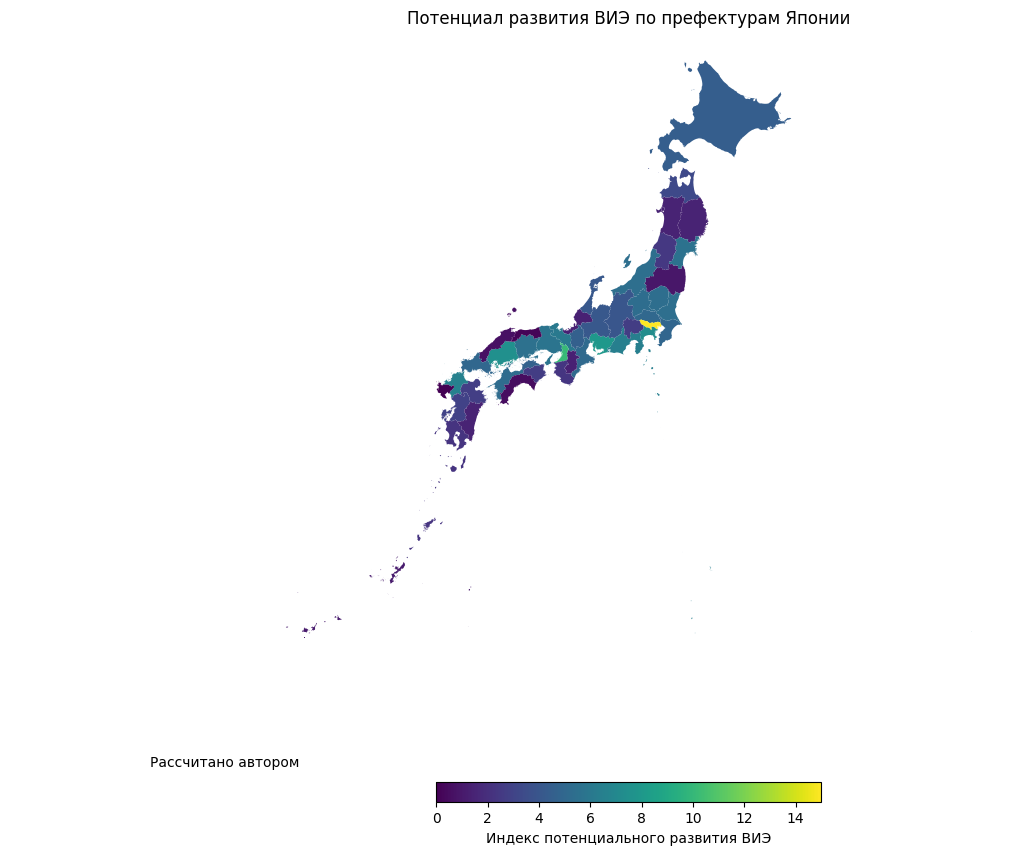

In [26]:
#визуализация полученного результата на карте Японии по регионам

fig, ax = plt.subplots(1, figsize=(15,10))
merged.plot(column='RE_Index', ax=ax)
ax.axis('off')

ax.set_title('Потенциал развития ВИЭ по префектурам Японии')

ax.annotate('Рассчитано автором', xy=(0.1,0.1), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top')

sm=plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=15))

cbar=fig.colorbar(sm, label='Индекс потенциального развития ВИЭ', ax=ax, orientation='horizontal', fraction=0.025)

plt.show()

In [ ]:
#сохранение полученной визуализации

fig.savefig('japanese_map.png', dpi=500)

Полученные результаты:

*   Столичный регион остается традиционным лидером по потенциалу развитию ВИЭ

*   Отдельного внимания заслуживает высокий потенциал развития ВИЭ в отдельных малонаселенных префектурах (Коти, префектуры региона Тохоку и др.)

*   Потенциал развития ВИЭ существенно разнится между регионами, а уровень экономического развития не является определяющим фактором



